# Mall Customer Segmentation Clustering

In this notebook I will try different cluster methods to learn more about unsupervised ML techniques. A short EDA was also conducted. For this purpose the "Mall Customer Segmentation Data" is used. The notebook is currently not yet complete and will be expanded over time. The big question to be answered is when to use which model and which data is necessary for specific use cases.

Dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

* [x] Hierarchical Clustering (Agglomerative method) 
* [x] K-means Clustering
* [x] Mean-shift Clustering
* [x] DBSCAN Clustering 
* [ ] Gaussian Mixture Models

##### Useful links from my research:
* Sklearn Clusters: https://scikit-learn.org/stable/modules/clustering.html
* Classification vs. Clustering: https://www.dotactiv.com/blog/classification-vs-clustering
* Use Cases (Real World): https://datafloq.com/read/7-innovative-uses-of-clustering-algorithms/6224
* Three Popular Clustering Methods: https://medium.com/predict/three-popular-clustering-methods-and-when-to-use-each-4227c80ba2b6
* Choosing the Right Clustering Algorithm : https://www.kdnuggets.com/2019/10/right-clustering-algorithm.html
* An Introduction to Clustering: https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/
* Clustering Algorithms: https://www.dotactiv.com/blog/clustering-algorithms

---

# Imports

Not all imports can be found here. The imports for the respective models are listed separately for reasons of clarity.

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
df = pd.read_csv("data/Mall_Customers.csv") 

---

# Quick Data Overview & Short EDA

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.shape

(200, 5)

https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis

https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis

---

## Spending Score & Age 

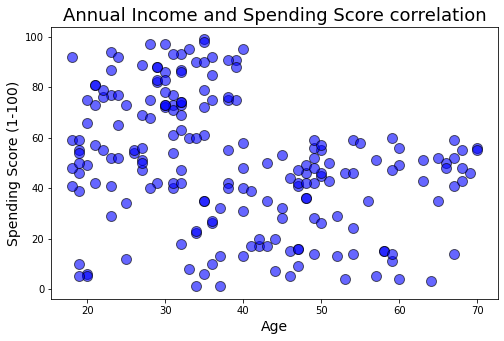

In [8]:
plt.figure(figsize=(8,5))
plt.title("Annual Income and Spending Score correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
#plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

**Assumptions:**
- No correlation to see between Age & Spending Score
- Maybe 2 clusters is the best approximation 

In [56]:
X = df[["Age", "Spending Score (1-100)"]]

In [57]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(X)

#### Hierarchical Clustering 

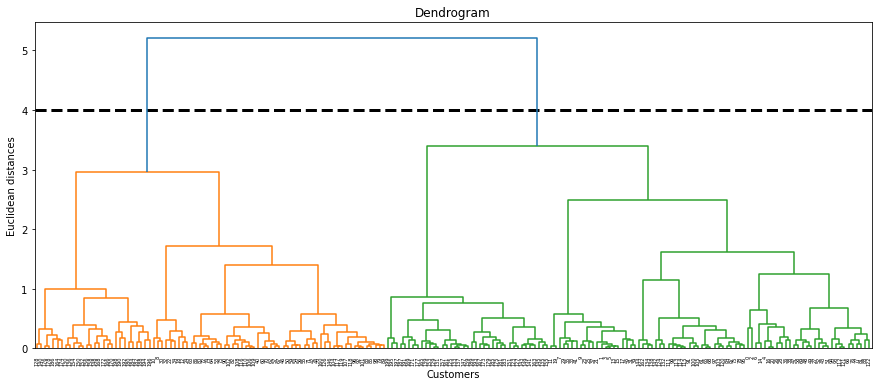

In [161]:
#Dendrogram
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=4,xmin=0,xmax=2000,lw=3,linestyles='--') # Horizontal line -> Look for the longest stretch of vertical line which is not crossed
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.show()

Count how many vertical lines cross the horizontal line to finde the number of clusters. 

From the plot we can see 2 clusters.

**Agglomerative method**

Post/Article to determine the linkage method: 
* https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering
* https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/#linkage

In [61]:
# Build the model 
from sklearn.cluster import AgglomerativeClustering
hc_a = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc_a = hc_a.fit_predict(X)

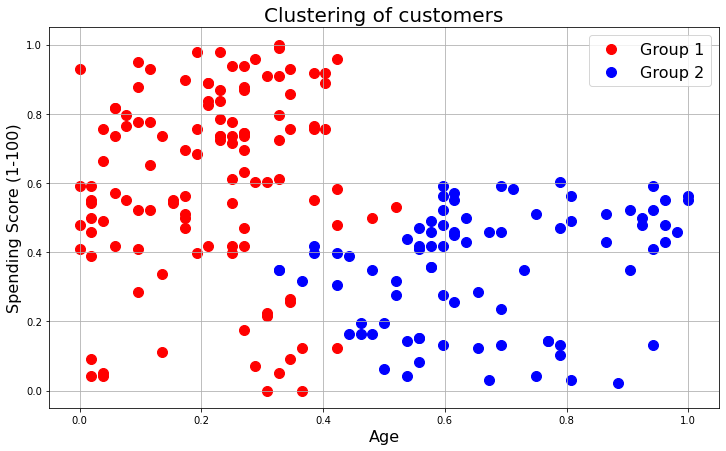

In [62]:
# Plot the clusters 
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc_a == 0, 0], X[y_hc_a == 0, 1], s = 100, c = 'red', label = 'Group 1')
plt.scatter(X[y_hc_a == 1, 0], X[y_hc_a == 1, 1], s = 100, c = 'blue', label = 'Group 2')
#plt.scatter(X[y_hc_a == 2, 0], X[y_hc_a == 2, 1], s = 100, c = 'green', label = 'Group 3')
plt.title('Clustering of customers',fontsize=20)
plt.xlabel('Age',fontsize=16)
plt.ylabel('Spending Score (1-100)',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

---

## Spending Score & Annual Income

I will use the **Hierarchical Clustering (Agglomerative method)**  again. But now with Annual Income instead of Age.

In [170]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [171]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(X)

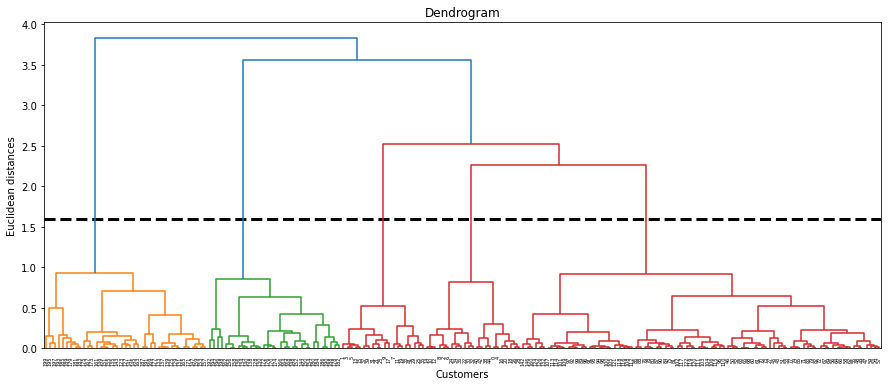

In [173]:
#Dendrogram
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=1.6,xmin=0,xmax=2000,lw=3,linestyles='--') # Horizontal line -> Look for the longest stretch of vertical line which is not crossed
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.show()

The horizontal line is crossing 5 vertical lines -> 5 clusters.

In [177]:
# Build the model 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

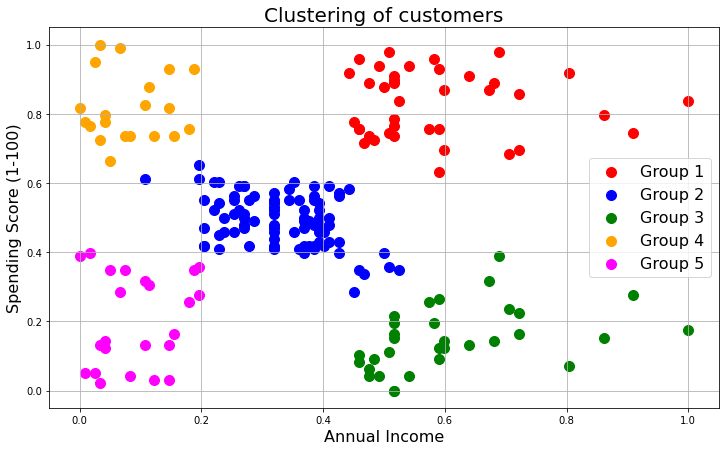

In [178]:
# Plot the clusters 
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Group 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Group 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Group 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'Group 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Group 5')
plt.title('Clustering of customers',fontsize=20)
plt.xlabel('Annual Income',fontsize=16)
plt.ylabel('Spending Score (1-100)',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

**Group 1** (red) should be our **target group** for marketing efforts because they have a high spending score and a high annual income.

---

##  Spending Score, Annual Income & Age 

We won't use Gender as a feature because all cluster models have big problems with categorical variables. There is no reason to use them, because they are already divided into classes.  

In [95]:
# Define X 
X = df[["Spending Score (1-100)", "Annual Income (k$)", "Age"]]

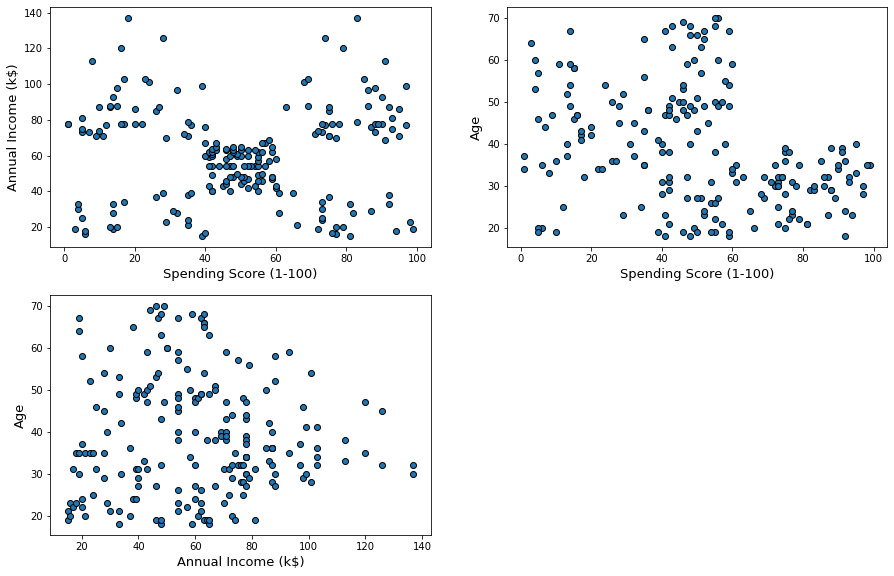

In [96]:
# Make scatter plot for each combination of feature
from itertools import combinations
lst_vars=list(combinations(X.columns,2))

r = len(lst_vars)

plt.figure(figsize=(15,15))
for i in range(1,r+1):
    plt.subplot(3,2,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(X[dim1],X[dim2],edgecolor='k')
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

In [97]:
# Scale the data 
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(X)

**Hierarchical Clustering (Agglomerative method)**

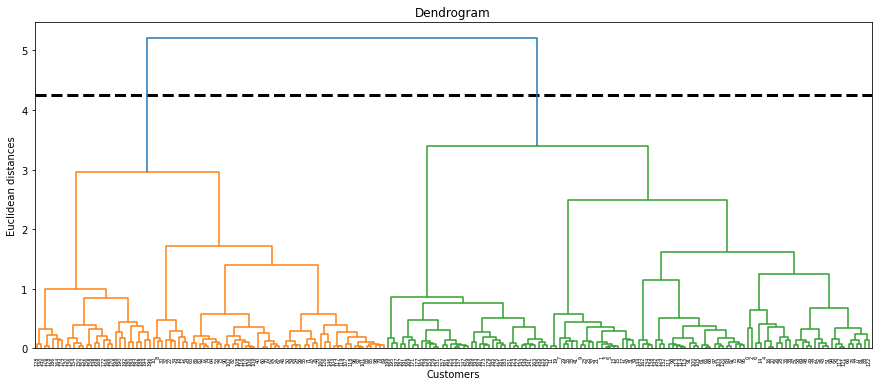

In [167]:
#Dendrogram
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=4.25,xmin=0,xmax=2000,lw=3,linestyles='--') # Horizontal line -> Look for the longest stretch of vertical line which is not crossed
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

As we can see there will be 2 clusters.

In [102]:
# Build the model 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [101]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X, y_hc)
print(clf.centroids_)
#"Spending Score (1-100)", "Annual Income (k$)", "Age" -> columns

[[0.62587966 0.35472018 0.21800398]
 [0.33102527 0.39929742 0.65361722]]


In [117]:
print("silhouette_score: ",silhouette_score(X,y_hc))

silhouette_score:  0.33752602297520423


**Interpretation:**
* Group 1 = Big young spenders (Target group?) 
* Group 2 = Older more conservative spenders (who earn a little bit more)

#### k-means Clustering 

In [112]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, completeness_score, v_measure_score

In [120]:
# For loop to get the metrics for the different numbers of cluster

km_scores= []
km_silhouette = []
vmeasure_score =[]
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X)
    preds = km.predict(X)
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X)))
    km_scores.append(-km.score(X))
    silhouette = silhouette_score(X,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    #v_measure = v_measure_score(y,preds)
    #vmeasure_score.append(v_measure)
    #print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -22.560774882609763
Silhouette score for number of cluster(s) 2: 0.3652498066402899
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -17.370109472896694
Silhouette score for number of cluster(s) 3: 0.36504262943838
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -12.650287676229926
Silhouette score for number of cluster(s) 4: 0.39231920205572196
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -10.303964892534127
Silhouette score for number of cluster(s) 5: 0.40611743307078185
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: -8.399422990228933
Silhouette score for number of cluster(s) 6: 0.42155417824552727
------

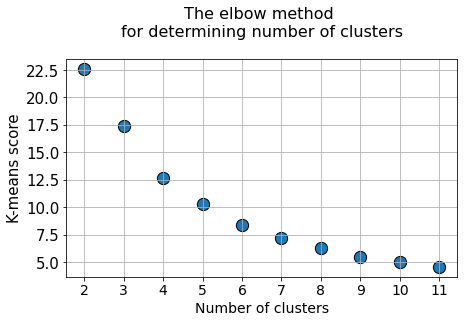

In [121]:
# Plot the elbow method to identify the best number of clusters

plt.figure(figsize=(7,4))
plt.title("The elbow method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)

plt.show()

Looks like the best number of clusters is 9 or 10.

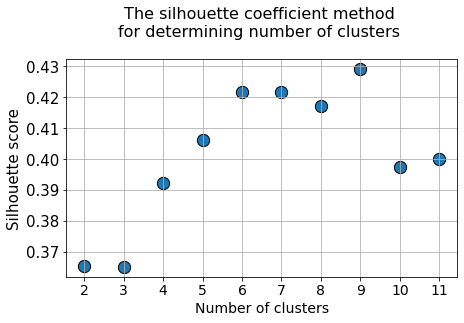

In [122]:
# Plot the silhouette coefficient to identify the best number of clusters

plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters \n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Looks like the best number of clusters is 9.

#### Mean-shift clustering 

In [123]:
from sklearn.cluster import MeanShift

In [124]:
ms_model = MeanShift().fit(X)
cluster_centers = ms_model.cluster_centers_
labels = ms_model.labels_
n_clusters = len(cluster_centers)
labels = ms_model.labels_

In [125]:
# Get the number of clusters 
print("Number of clusters detected by the algorithm:", n_clusters)

Number of clusters detected by the algorithm: 1


In [127]:
# Show us the Cluster centers 

print("Cluster centers detected at:\n\n", cluster_centers)

Cluster centers detected at:

 [[0.59961127 0.35811866 0.30265568]]


#### DBSCAN clustering

In [128]:
from sklearn.cluster import DBSCAN

Find optimal EPS: https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

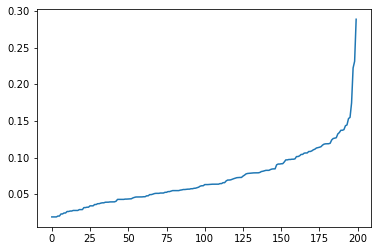

In [143]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

"The optimal value for epsilon will be found at the point of maximum curvature."

In [150]:
dbs_model = DBSCAN(eps=0.15)
dbs_model.fit(X)

DBSCAN(eps=0.15)

In [156]:
#"The labels_ property contains the list of clusters and their respective points."
dbs_model.labels_

array([-1,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0, -1,  0,  1,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2, -1,  2,
        0,  2, -1,  2,  0,  2,  0,  2, -1,  2,  0,  2,  0,  2,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  2, -1,  2, -1,  2,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2, -1,  2, -1,
        2,  0,  2,  0,  2, -1,  2, -1, -1, -1, -1, -1, -1], dtype=int64)

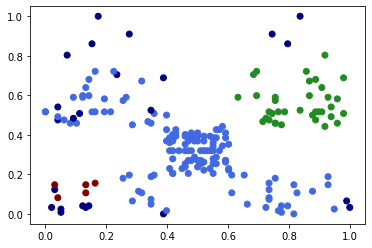

In [169]:
clusters = dbs_model.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters));

Dark-blue is the noise and we can see 3 clusters

#### Gaussian Mixture Model

Will follow.